In [1]:
import pandas as pd

Date updated till 02/17/2019

Standardizing the columns names and combining Mainland China and China

In [2]:
df_lat=pd.read_csv("time_series_covid_19_confirmed.csv")
df_lat=df_lat.rename(columns={"Country/Region":"Country"})
df_lat.loc[df_lat['Country']=='Mainland China','Country']="China"
df_lat.head()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20
0,Anhui,China,31.82571,117.2264,1,9,15,39,60,70,...,860,889,910,934,950,962,973,982,986,987
1,Beijing,China,40.18238,116.4142,14,22,36,41,68,80,...,342,352,366,372,375,380,381,387,393,395
2,Chongqing,China,30.05718,107.8740,6,9,27,57,75,110,...,505,518,529,537,544,551,553,555,560,567
3,Fujian,China,26.07783,117.9895,1,5,10,18,35,59,...,267,272,279,281,285,287,290,292,293,293
4,Gansu,China,36.06110,103.8343,0,2,2,4,7,14,...,86,87,90,90,90,90,91,91,91,91


In [3]:
df_cov=pd.read_csv("2019_nCoV_data.csv")
df_cov.loc[df_cov['Country']=='Mainland China','Country']="China"

In [4]:
df_cov.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0


Merging the dataset containing information about latitude and longitude with the dataset contating infromation about the corona cases

In [5]:
df_master=pd.merge(df_cov,df_lat,on=['Country','Province/State'],how='left')
df_master.shape

(1719, 40)

In [6]:
df_master.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,Lat,Long,...,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0,31.82571,117.2264,...,860.0,889.0,910.0,934.0,950.0,962.0,973.0,982.0,986.0,987.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0,40.18238,116.4142,...,342.0,352.0,366.0,372.0,375.0,380.0,381.0,387.0,393.0,395.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0,30.05718,107.8740,...,505.0,518.0,529.0,537.0,544.0,551.0,553.0,555.0,560.0,567.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0,26.07783,117.9895,...,267.0,272.0,279.0,281.0,285.0,287.0,290.0,292.0,293.0,293.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0,36.06110,103.8343,...,86.0,87.0,90.0,90.0,90.0,90.0,91.0,91.0,91.0,91.0


Converting to relevant fromats

In [7]:
df_master.drop(df_master.iloc[:, 10:], axis=1,inplace=True)
df_master['Date'] = pd.to_datetime(df_master['Date'])

In [8]:
df_master.dtypes

Sno                        int64
Date              datetime64[ns]
Province/State            object
Country                   object
Last Update               object
Confirmed                float64
Deaths                   float64
Recovered                float64
Lat                      float64
Long                     float64
dtype: object

Defining the relevant ratios that I will like to explore later

In [9]:
def ratios(df):
    df['InProgress']=df['Confirmed']-(df['Deaths']+df['Recovered'])
    df['DeathRatio']=round((df['Deaths']/df['Confirmed'])*100,2)
    df['RecoveredRatio']=round((df['Recovered']/df['Confirmed'])*100,2)
    df['PendingRatio']=round((df['InProgress']/df['Confirmed'])*100,2)
    df.fillna(0)

In [10]:
ratios(df_master)

In [11]:
df_master.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,Lat,Long,InProgress,DeathRatio,RecoveredRatio,PendingRatio
0,1,2020-01-22 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0,31.82571,117.2264,1.0,0.0,0.0,100.0
1,2,2020-01-22 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0,40.18238,116.4142,14.0,0.0,0.0,100.0
2,3,2020-01-22 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0,30.05718,107.8740,6.0,0.0,0.0,100.0
3,4,2020-01-22 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0,26.07783,117.9895,1.0,0.0,0.0,100.0
4,5,2020-01-22 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0,36.06110,103.8343,0.0,NaN,NaN,NaN


In [12]:
len(df_master)

1719

Removing the null values in the dataset and replacing them with 0

In [13]:
df_master=df_master.fillna(0)

**Plotting the map; Here I am analyzing the number of cases confirmed in each region and giving infromation about the following:**
<li>1. Country 
<li>2. Province
<li>3. Confirmed Cases
<li>4. Death Cases
<li>5. Recovered Cases 
<li>6. Current Cases
<li>7. Death Ratio
<li>8. Recovered Ratio

In [14]:
import plotly.express as px
import folium

m = folium.Map(location=[0,0], tiles='OpenStreetMap',
               min_zoom=1, max_zoom=5, zoom_start=1)


for i in range(0, len(df_master)):
    folium.Circle(
        location=[df_master.iloc[i]['Lat'], df_master.iloc[i]['Long']],
        color='darkblue', 
        tooltip =   '<li>Country : '+str(df_master.iloc[i]['Country'])+
                    '<li>Province : '+str(df_master.iloc[i]['Province/State'])+
                    '<li>Confirmed : '+str(df_master.iloc[i]['Confirmed'])+
                    '<li>Deaths : '+str(df_master.iloc[i]['Deaths'])+
                    '<li>Recovered : '+str(df_master.iloc[i]['Recovered'])+
                    '<li>InProgress : '+str(df_master.iloc[i]['InProgress'])+
                    '<li>DeathRatio : '+str(df_master.iloc[i]['DeathRatio'])+                       
                    '<li>RecoveredRatio : '+str(df_master.iloc[i]['RecoveredRatio']),
        radius=int(df_master.iloc[i]['Confirmed'])).add_to(m)
m

#### Now I am analyzing various ratios

In [26]:
style_statement = '<style>.leaflet-control{color:#00FF00}</style>'
m.get_root().html.add_child(folium.Element(style_statement))
m

Analyzing the data based on countries rather than region to better understand the trends

In [15]:
df_country=df_master.groupby('Country').sum()
df_country.reset_index(inplace=True)
df_country.head()


,Country,Sno,Confirmed,Deaths,Recovered,Lat,Long,InProgress,DeathRatio,RecoveredRatio,PendingRatio
0,Australia,80718,284.0,0.0,70.0,-2720.1933,11932.5067,214.0,0.0,1800.0,6500.0
1,Belgium,17149,14.0,0.0,1.0,707.0546,62.5786,13.0,0.0,100.0,1300.0
2,Brazil,83,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0
3,Cambodia,20871,22.0,0.0,6.0,276.4454,2309.8020,16.0,0.0,600.0,1600.0
4,Canada,59273,116.0,0.0,6.0,2334.5082,-4994.9685,110.0,0.0,600.0,5300.0


In [16]:
ratios(df_country)
df_country.head(2)

,Country,Sno,Confirmed,Deaths,Recovered,Lat,Long,InProgress,DeathRatio,RecoveredRatio,PendingRatio
0,Australia,80718,284.0,0.0,70.0,-2720.1933,11932.5067,214.0,0.0,24.65,75.35
1,Belgium,17149,14.0,0.0,1.0,707.0546,62.5786,13.0,0.0,7.14,92.86


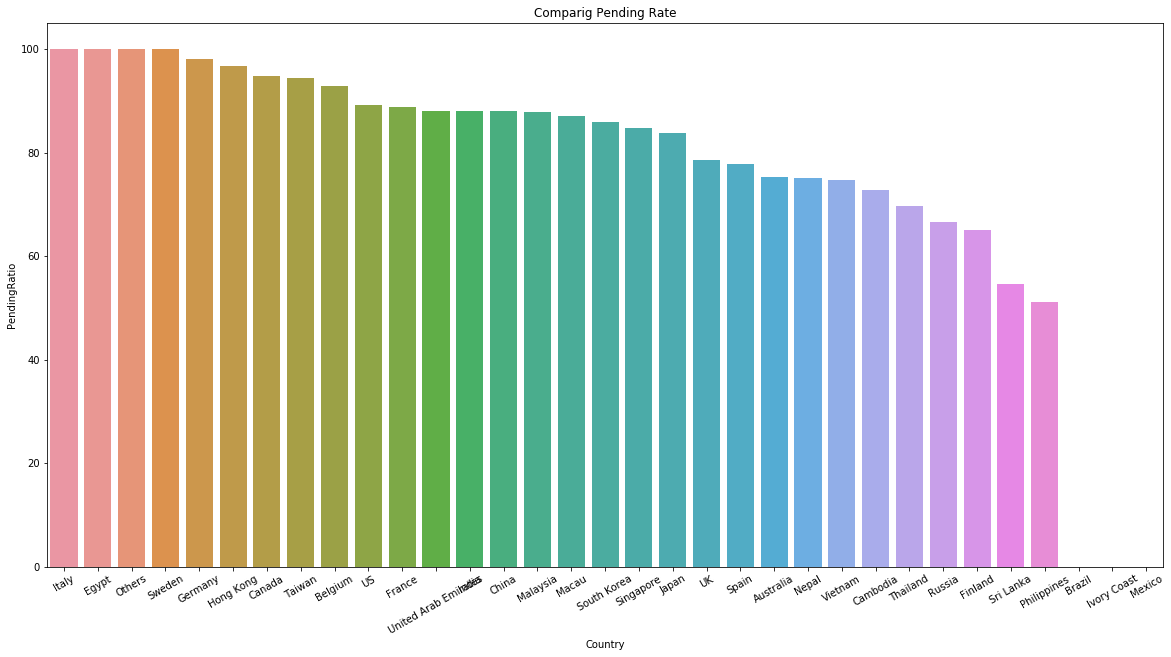

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
dim=(20,10)
fig, ax = plt.subplots(figsize=dim)
df_country=df_country.sort_values('PendingRatio',ascending=False)
ax=sns.barplot(x='Country',y='PendingRatio',data=df_country)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.title("Comparig Pending Rate")
plt.show()

By 17th Feb 100% corona cases were in progress in countries like Egypt, Sweden, Italy, Germany cases 

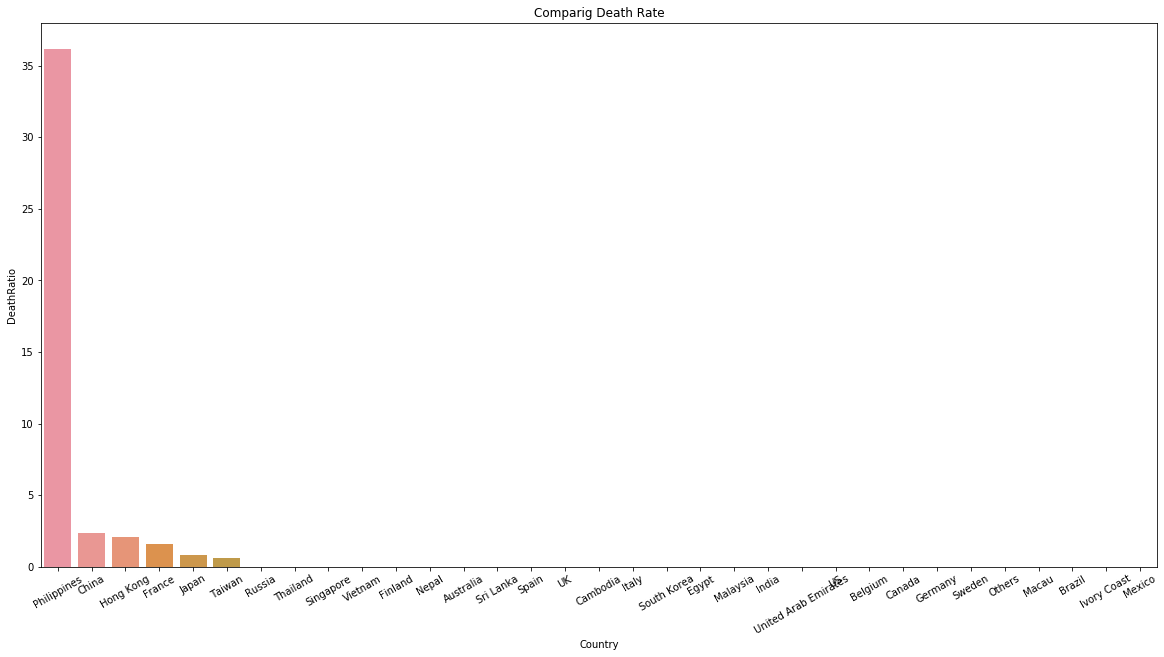

In [18]:
dim=(20,10)
fig, ax = plt.subplots(figsize=dim)
df_country=df_country.sort_values('DeathRatio',ascending=False)
ax=sns.barplot(x='Country',y='DeathRatio',data=df_country)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.title("Comparig Death Rate")
plt.show()

This is really strange! By 17th Feb, the death rate in Philippeines was really high! It was more than 35% where as China had rate somewhere around 3%

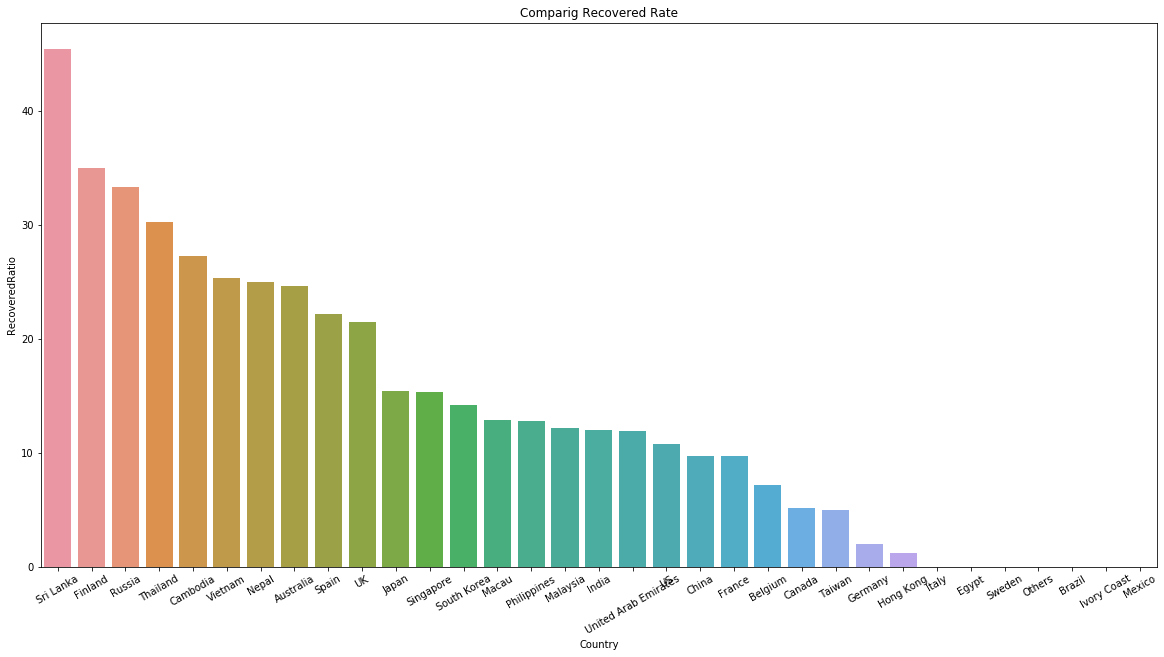

In [19]:
dim=(20,10)
fig, ax = plt.subplots(figsize=dim)
df_country=df_country.sort_values('RecoveredRatio',ascending=False)
ax=sns.barplot(x='Country',y='RecoveredRatio',data=df_country)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.title("Comparig Recovered Rate")
plt.show()

The recovery rate of Sri Lank, Finland, Russia is very good!

In [20]:
df_master.head(2)

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,Lat,Long,InProgress,DeathRatio,RecoveredRatio,PendingRatio
0,1,2020-01-22 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0,31.82571,117.2264,1.0,0.0,0.0,100.0
1,2,2020-01-22 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0,40.18238,116.4142,14.0,0.0,0.0,100.0


Let us check how the virus is progressing with respect to time

In [21]:
df_master.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,Lat,Long,InProgress,DeathRatio,RecoveredRatio,PendingRatio
0,1,2020-01-22 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0,31.82571,117.2264,1.0,0.0,0.0,100.0
1,2,2020-01-22 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0,40.18238,116.4142,14.0,0.0,0.0,100.0
2,3,2020-01-22 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0,30.05718,107.8740,6.0,0.0,0.0,100.0
3,4,2020-01-22 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0,26.07783,117.9895,1.0,0.0,0.0,100.0
4,5,2020-01-22 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0,36.06110,103.8343,0.0,0.0,0.0,0.0


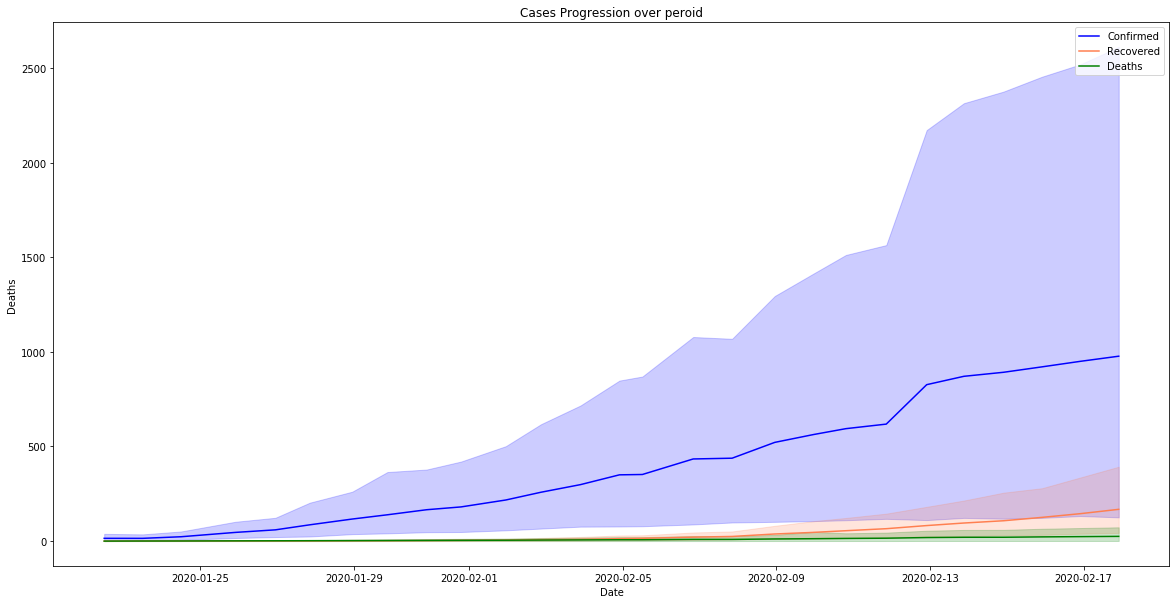

In [22]:
fig, ax = plt.subplots(figsize=dim)
# df_time=df_country.sort_values('Pending Cases',ascending=False)
ax=sns.set_color_codes("dark")
ax=sns.lineplot(x='Date',y='Confirmed',data=df_master, color="blue",label='Confirmed')
ax=sns.set_color_codes("dark")
ax=sns.lineplot(x='Date',y='Recovered',data=df_master,color="coral",label='Recovered')
ax=sns.set_color_codes("dark")
ax=sns.lineplot(x='Date',y='Deaths',data=df_master, color="green",label='Deaths')
plt.title("Cases Progression over peroid")
plt.show()